# Sentiment Analysis of Airline Review Data

---

This is the dataset I'm working with: [https://www.airlinequality.com/airline-reviews/british-airways] We can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links. The text is is fairly unstructured, so we will have to do some work to clean it before our analysis. 

In [252]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
from textblob import TextBlob
from textblob.np_extractors import ConllExtractor
from collections import defaultdict

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\keith\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [253]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [254]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Great thing about British Airw...
1,Not Verified | The staff are friendly. The pla...
2,✅ Trip Verified | Probably the worst business ...
3,"✅ Trip Verified | Definitely not recommended, ..."
4,✅ Trip Verified | BA shuttle service across t...


The loops above collected 1000 reviews by iterating through the paginated pages on the website. 

Next we clean the data by removing any unnecessary stopwords, symbols, punctuation, integers, lowercasing all the characters.

Once the data is clean, we can perform our sentiment analysis using the nltk module sentiment analyzer.

After that, we can also extract common phrases from the reviews using the textblob module to create a bar chart consisting of the top 10 phrases in the reviews.

In [267]:
def sentiment_analysis(df):
    #clean data by removing generic identifiers
    df = df.copy()
    df = df.replace(regex=r'✅ Trip Verified \| ', value='')
    df = df.replace(regex=r'Not Verified \| ', value='')
    
    #create data structures to store results
    polarity = []
    phrases = defaultdict(int)
    all_text = ''
    
    #remove all punctuation, trailing whitespace, lowercase all characters, remove stopwords, remove integers
    #assign score based on words in review and add that score to the dataframe
    for i in range(len(df)):
        text = re.sub(r'[^\w\s]', '', df.iloc[i]['reviews']).strip().lower()
        all_text += text + ' '
        text = text.split()
        text = [w for w in text if w.isnumeric() == False]
        text = ' '.join(text)
        
        sid = SentimentIntensityAnalyzer()
        score = sid.polarity_scores(text)['compound']
        if score > 0:
            polarity.append('positive')
        elif score < 0: 
            polarity.append('negative')
        else:
            polarity.append('neutral')
        
    df['score'] = polarity
    all_text = all_text[:-1]
    
    
    #extract percentage of positive, negative, neutral reviews    
    l = len(sentiment)
    sent_dic = {}
    
    for w in df['score'].unique():
        tdf = df[df['score'] == w]
        perc = len(tdf) / l
        sent_dic[w] = round(perc * 100, 1)
            
    print(sent_dic)
    
    #create bar chart of top ten phrases within all reviews
    extractor = ConllExtractor()
    blob = TextBlob(all_text, np_extractor=extractor)
    for b in blob.noun_phrases:
        phrases[b] += 1
    top10_phrases = dict(sorted(phrases.items(), key=lambda item: item[1], reverse=True))
    
    plt.bar(list(top10_phrases.keys())[:10], list(top10_phrases.values())[:10])
    plt.xticks(rotation=45)

    plt.savefig('phrases.pdf', bbox_inches='tight')
    plt.show()


Now we can display the results, including the percentage of positive, negative, and neutral reviews.
We can also display the top 10 phrases that appear in the review data

{'positive': 52.9, 'negative': 46.6, 'neutral': 0.5}


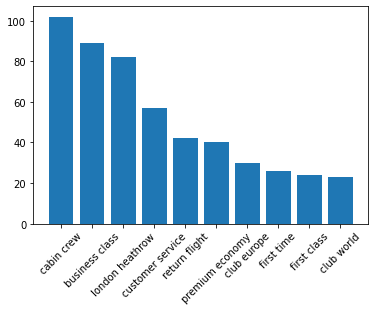

In [268]:
sentiment_analysis(df)

This information can be used by the airline company to make sense of mostly unstructured review data by giving us a clear percentage value of positive and negative reviews, and gain insights into what their customers our discussing in their reviews so they know how best to improve their services by focusing on the top 10 most discussed topics in the reviews